In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [5]:
train_data = '/content/drive/MyDrive/Baitap_AI/mon_an/train'
test_data =  '/content/drive/MyDrive/Baitap_AI/mon_an/test'
val_data  =  '/content/drive/MyDrive/Baitap_AI/mon_an/test'

In [8]:
from keras.engine.data_adapter import train_validation_split
data_scale = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,target_size=(120, 120),batch_size=32,class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,target_size=(120, 120),batch_size=32,class_mode="categorical")

Found 233 images belonging to 10 classes.
Found 90 images belonging to 10 classes.
Found 90 images belonging to 10 classes.


In [11]:
class_name = ['BÁNH BÈO', 'BÁNH MÌ', 'BÁNH TÉT', 'BÁNH TRÁNG TRỘN', 'BÁNH XÈO', 'CHÈ TRÔI NƯỚC', 'CƠM CHIÊN', 'CUỐN', 'KẸO KÉO', 'PHỞ']

In [12]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại mon an: ",train_input.num_classes)

labels:  ['BÁNH BÈO', 'BÁNH MÌ', 'BÁNH TÉT', 'BÁNH TRÁNG TRỘN', 'BÁNH XÈO', 'CHÈ TRÔI NƯỚC', 'CƠM CHIÊN', 'CUỐN', 'KẸO KÉO', 'PHỞ']
match class:  {'bánh bèo': 0, 'bánh mì': 1, 'bánh tét': 2, 'bánh tráng trộn': 3, 'bánh xèo': 4, 'chè trôi nước': 5, 'cơm chiên': 6, 'cuốn': 7, 'kẹo kéo': 8, 'phở': 9}
Tổng cộng các loại mon an:  10


In [13]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


In [14]:
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))  
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [15]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
food_train = model.fit(train_input,batch_size=30,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
8/8 [==============================] - 102s 13s/step - loss: 33.4069 - accuracy: 0.0858 - val_loss: 2.3872 - val_accuracy: 0.0778
Epoch 2/100
8/8 [==============================] - 2s 291ms/step - loss: 2.7061 - accuracy: 0.1116 - val_loss: 2.2984 - val_accuracy: 0.1333
Epoch 3/100
8/8 [==============================] - 2s 279ms/step - loss: 2.2954 - accuracy: 0.1288 - val_loss: 2.2932 - val_accuracy: 0.1111
Epoch 4/100
8/8 [==============================] - 2s 283ms/step - loss: 2.2865 - accuracy: 0.1631 - val_loss: 2.2841 - val_accuracy: 0.1111
Epoch 5/100
8/8 [==============================] - 2s 282ms/step - loss: 2.2854 - accuracy: 0.1459 - val_loss: 2.2905 - val_accuracy: 0.1111
Epoch 6/100
8/8 [==============================] - 2s 304ms/step - loss: 2.2789 - accuracy: 0.1459 - val_loss: 2.2887 - val_accuracy: 0.1111
Epoch 7/100
8/8 [==============================] - 2s 288ms/step - loss: 2.2784 - accuracy: 0.1288 - val_loss: 2.2849 - val_accuracy: 0.1111
Epoch 8/100


In [17]:
model.save('/content/drive/MyDrive/Baitap_AI/mon_an/food.h5')

array([1])

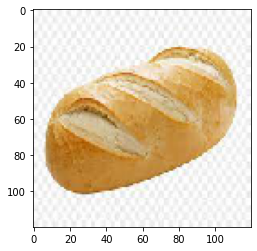

In [18]:
pic = image.load_img('/content/drive/MyDrive/Baitap_AI/mon_an/banhmi.jpg', target_size=(120,120)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,120,120,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

In [19]:
guess=np.argmax(model.predict(pic), axis=1)

In [20]:
if guess[0]==0:
  print("Loai do an: BANH BEO")
if guess[0]==1:
  print("Loai do an: BANH MI")
if guess[0]==2:
  print("Loai do an: BANH TET")
if guess[0]==3:
  print("Loai do an: BANH TRANG TRON")
if guess[0]==4:
  print("Loai do an: BANH TROI NUOC")
if guess[0]==5:
  print("Loai do an: BANH XEO")
if guess[0]==6:
  print("Loai do an: CƠM CHIEN")
if guess[0]==7:
  print("Loai do an: CUON")
if guess[0]==8:
  print("Loai do an: KEO KEO")
if guess[0]==9:
  print("Loai do an: PHO")

Loai do an: BANH MI
